In [2]:
%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns


In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_38e259f9880e4aa69506f5d213e0a3a7 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='mo5NpgYwfNte30ZGn-BpHl2e9_Ovz3xKOEuDUyi8LAKh',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_38e259f9880e4aa69506f5d213e0a3a7.get_object(Bucket='lifeexpectancyprediction-donotdelete-pr-szywmicihlmlqu',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df_data_0.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [6]:
dummy = pd.get_dummies(df_data_0['Status'])

In [7]:
df_data_0 = pd.concat([df_data_0 , dummy] , axis = 1)


In [8]:
df_data_0.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Developed                            0
Developing                           0
dtype: int64

In [9]:
df_data_0['Adult Mortality'].fillna(df_data_0['Adult Mortality'].mean())
df_data_0['Alcohol'].fillna(df_data_0['Alcohol'].mean())
df_data_0['Hepatitis B'].fillna(0)
df_data_0[' BMI '].fillna(df_data_0[' BMI '].mean())
df_data_0['Polio'].fillna(0)



0        6.0
1       58.0
2       62.0
3       67.0
4       68.0
5       66.0
6       63.0
7       64.0
8       63.0
9       58.0
10      58.0
11       5.0
12      41.0
13      36.0
14      35.0
15      24.0
16      99.0
17      98.0
18      99.0
19      99.0
20      99.0
21      99.0
22      98.0
23      99.0
24      99.0
25      97.0
26      97.0
27      98.0
28      97.0
29      98.0
        ... 
2908    74.0
2909     7.0
2910    83.0
2911     8.0
2912    93.0
2913     9.0
2914    77.0
2915    83.0
2916    84.0
2917    84.0
2918    85.0
2919    85.0
2920    86.0
2921    85.0
2922    88.0
2923    92.0
2924    95.0
2925    95.0
2926    93.0
2927    89.0
2928    69.0
2929    75.0
2930    73.0
2931    71.0
2932    69.0
2933    67.0
2934     7.0
2935    73.0
2936    76.0
2937    78.0
Name: Polio, Length: 2938, dtype: float64

In [10]:
df_data_0.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,...,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,...,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,0.174268,0.825732
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,...,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,0.379405,0.379405
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,...,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,0.000000,1.000000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,...,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,0.000000,1.000000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,...,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,0.000000,1.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,...,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,1.000000,1.000000


In [11]:
df_data_0.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Developed',
       'Developing'],
      dtype='object')

In [12]:
df = df_data_0.drop('Status' , axis = 1)

In [13]:
df.columns

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Developed',
       'Developing'],
      dtype='object')

(22, 0)

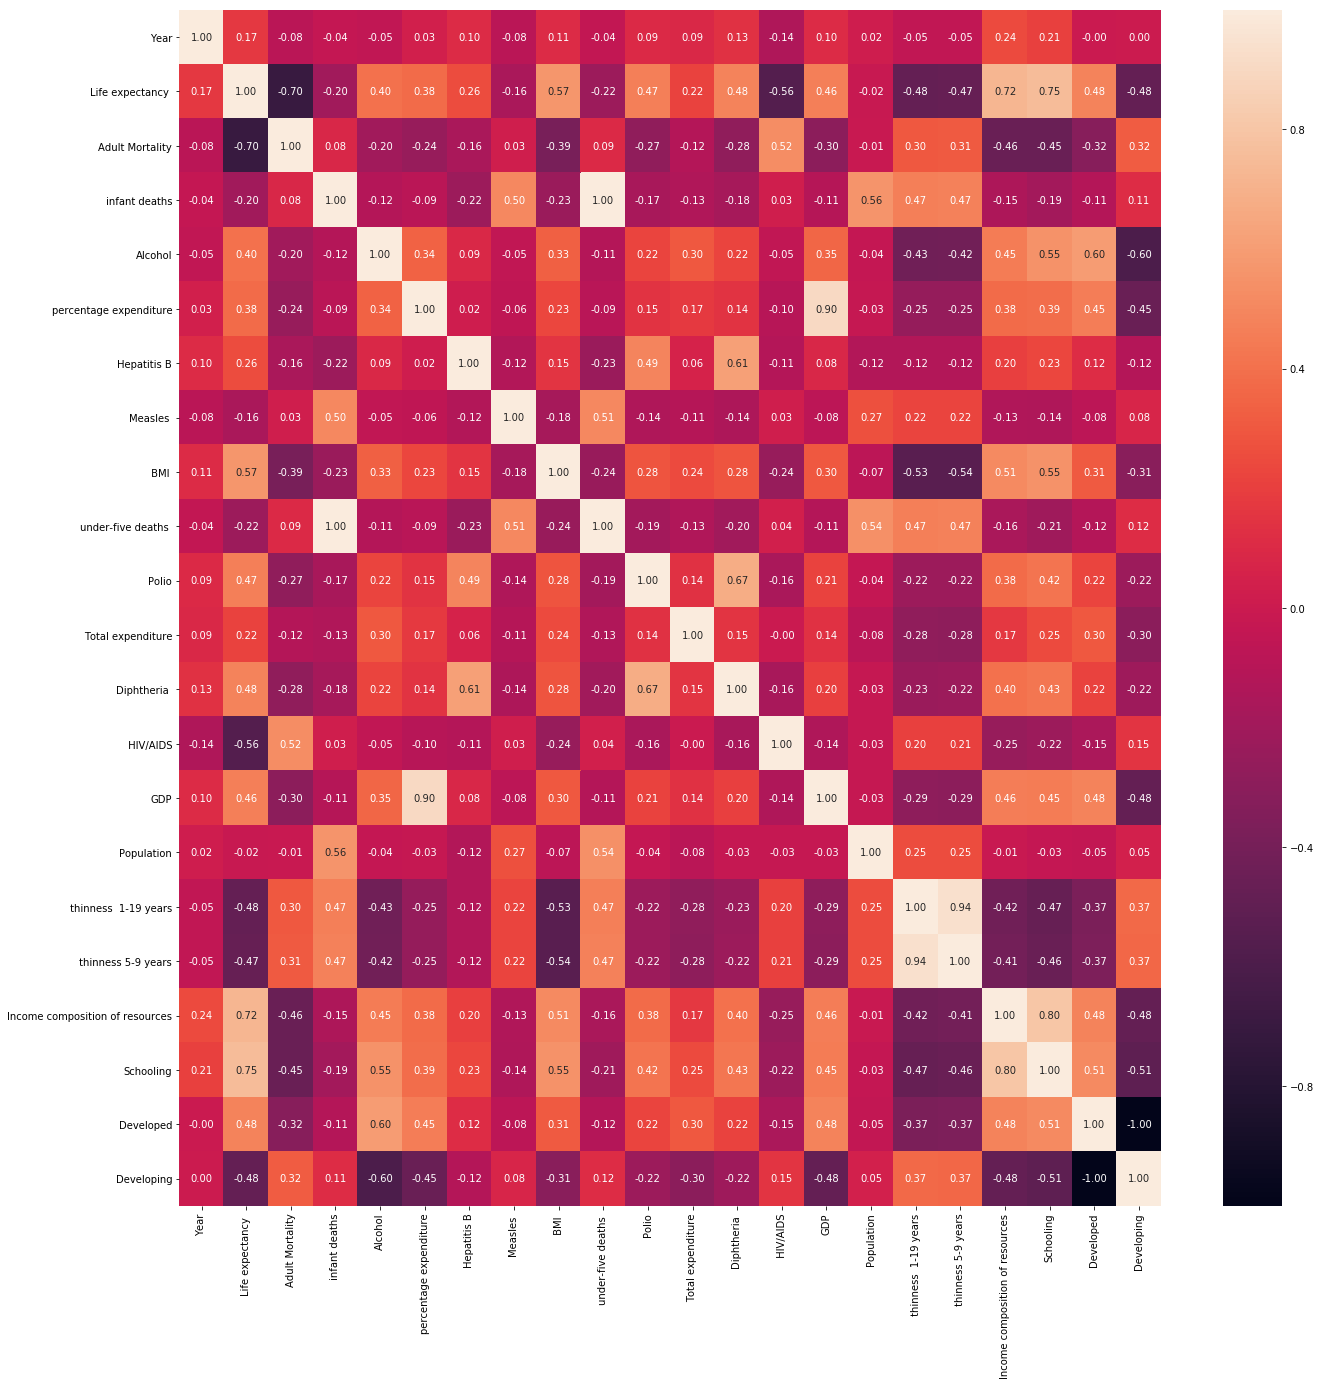

In [14]:
f , ax = plt.subplots(figsize = (22 , 22))
sns.heatmap(df.corr() , annot = True , fmt = '0.2f' , ax = ax)
ax.set_ylim(22 , 0)

In [15]:
df = df.dropna()

In [16]:
df.isnull().sum()

Country                            0
Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Developed                          0
Developing                         0
dtype: int64

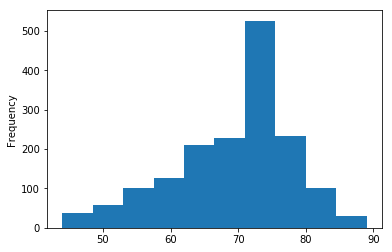

In [17]:
df['Life expectancy '].plot.hist()

In [18]:
df.describe().iloc[:, 1:]

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,...,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000
mean,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,...,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891,0.146756,0.853244
std,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,...,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388,0.353969,0.353969
min,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,...,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000,0.000000,0.000000
25%,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,...,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000,0.000000,1.000000
50%,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,...,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000,0.000000,1.000000
75%,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,...,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000,0.000000,1.000000
max,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,...,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000,1.000000,1.000000


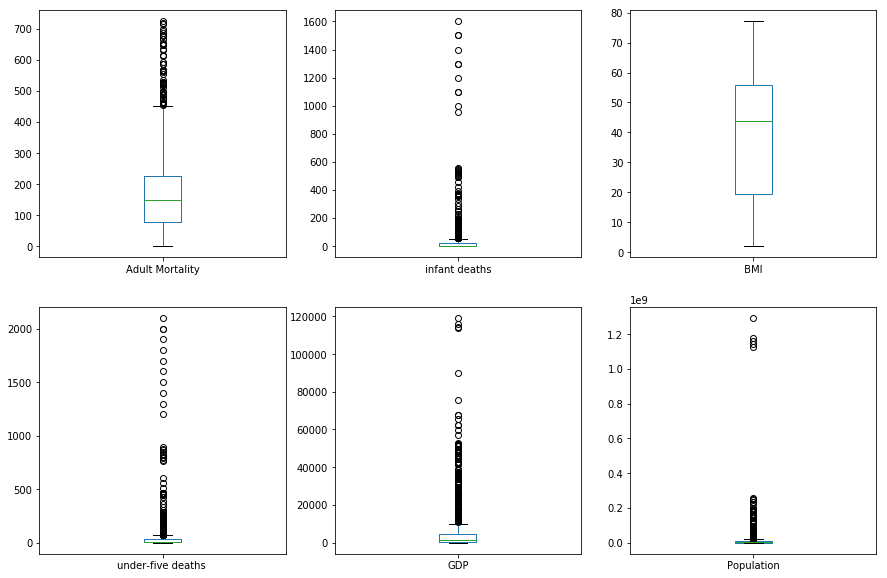

In [18]:
plt.figure(figsize = (15, 10))
for i , col in enumerate(['Adult Mortality' ,  'infant deaths' , ' BMI ', 'under-five deaths ','GDP', 'Population'] , start = 1):
    plt.subplot(2 , 3 , i )
    df[col].plot.box()
    

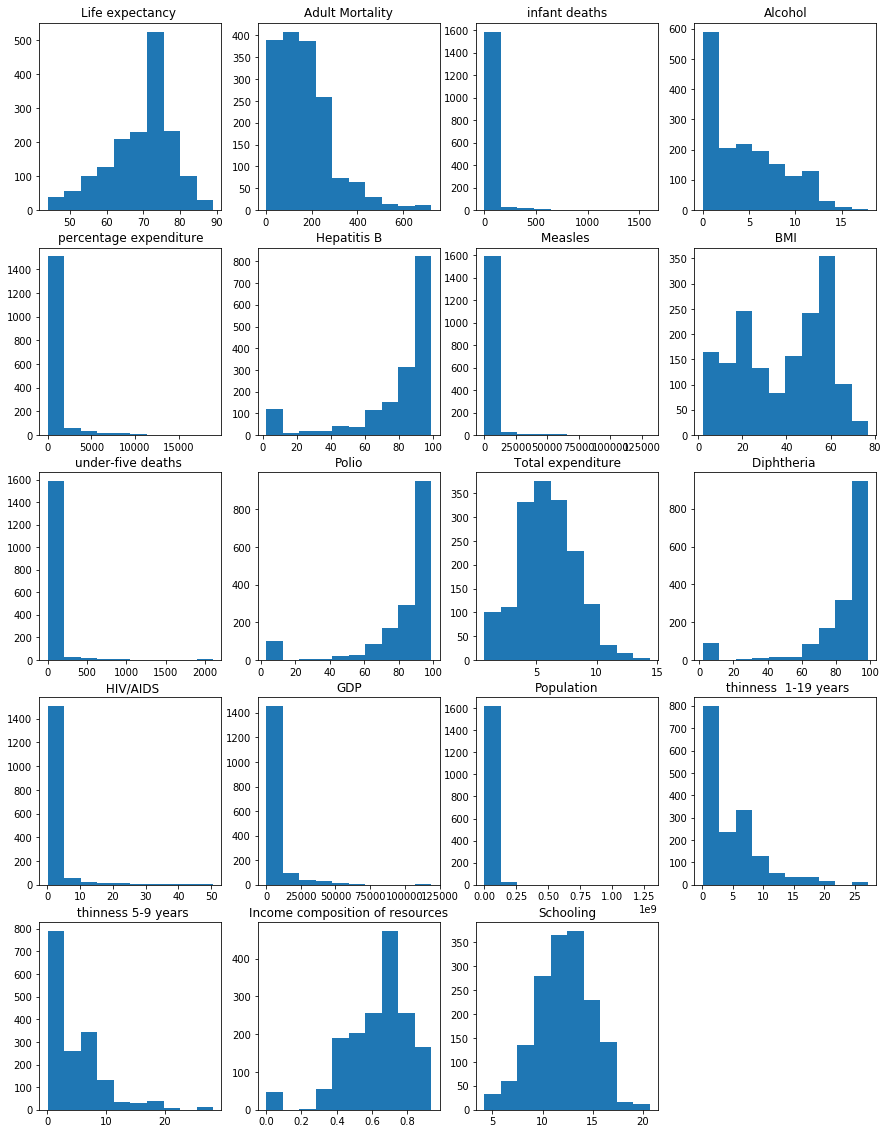

In [19]:
plt.figure(figsize = (15, 20))
for i , col in enumerate(['Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'] , start = 1):
    plt.subplot(5 , 4 , i)
    plt.hist(df[col])
    plt.title(col)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

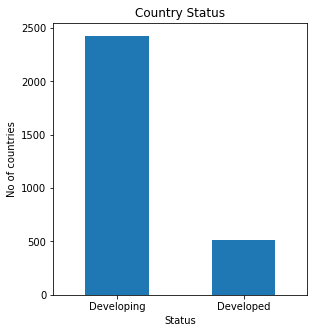

In [20]:
plt.figure(figsize = (10 , 5))
plt.subplot(121)
df_data_0.Status.value_counts().plot(kind = "bar")
plt.title("Country Status")
plt.xlabel("Status")
plt.ylabel("No of countries")
plt.xticks(rotation = 0)

Text(0.5, 1.0, 'Life xpectancy by year')

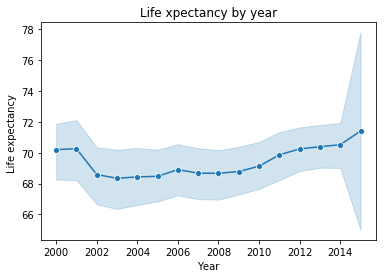

In [21]:
sns.lineplot('Year', 'Life expectancy ' , data = df , marker = 'o' )
plt.title("Life xpectancy by year")

In [33]:
X = df[[ 'Year', 'Adult Mortality', 
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling' ,'Developed',
       'Developing']]
Y = df[['Life expectancy ']]

In [34]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.4 , random_state = 108)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()

In [37]:
lm.fit(X_train , Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
predictions = lm.predict(X_test)

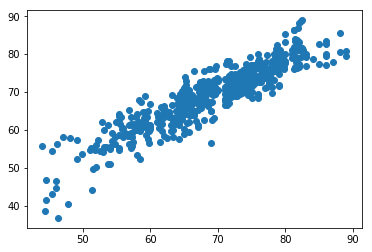

In [39]:
plt.scatter(Y_test , predictions)

In [40]:
from sklearn import metrics


In [41]:
lm.score(X_test ,  Y_test)

0.8314498958211024

In [42]:
lm.score(X_train , Y_train)

0.8413458932771577

In [33]:
!pip install watson-machine-learning-client

In [44]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-06 12:03:29,263 - watson_machine_learning_client.wml_client_error - WARNING - Getting instance details failed. (GET https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/0167cb02-be2b-4951-9dca-bdae9ddbc879)
Status code: 401, body: {"trace":"33172dabaa7f7769972c3a290795e5c4","errors":[{"code":"authorization_rejected","message":"Futures timed out after [15 seconds]","target":{"type":"header","name":"Authorization"}}]}
2020-06-06 12:07:26,466 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.
2020-06-06 12:36:42,913 - ibm_botocore.credentials - WARNING - Refreshing temporary credentials failed during advisory refresh period.
Traceback (most recent call last):
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/ibm_botocore/vendored/requests/packages/urllib3/connectionpool.py", line 372, in _make_request
    httplib_response = conn.getresponse(buffering=True)
TypeError: getresponse() got an unexpected keyword argum

2020-06-06 13:22:07,881 - ibm_botocore.credentials - WARNING - Refreshing temporary credentials failed during advisory refresh period.
Traceback (most recent call last):
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/ibm_botocore/vendored/requests/packages/urllib3/connectionpool.py", line 372, in _make_request
    httplib_response = conn.getresponse(buffering=True)
TypeError: getresponse() got an unexpected keyword argument 'buffering'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/ibm_botocore/vendored/requests/packages/urllib3/connectionpool.py", line 374, in _make_request
    httplib_response = conn.getresponse()
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 1346, in getresponse
    response.begin()
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 307, in begin
    version, status, reason = self._read_status()

2020-06-06 13:22:29,243 - ibm_botocore.credentials - WARNING - Refreshing temporary credentials failed during advisory refresh period.
Traceback (most recent call last):
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/ibm_botocore/vendored/requests/packages/urllib3/connectionpool.py", line 372, in _make_request
    httplib_response = conn.getresponse(buffering=True)
TypeError: getresponse() got an unexpected keyword argument 'buffering'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/ibm_botocore/vendored/requests/packages/urllib3/connectionpool.py", line 374, in _make_request
    httplib_response = conn.getresponse()
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 1346, in getresponse
    response.begin()
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 307, in begin
    version, status, reason = self._read_status()

In [47]:
wml_credentials={
"apikey": "Kfot-sfPbMBe9AWTJYD7uGvVSoSZ1KZ6HLcW__p0Agr5",
  
  "instance_id": "0167cb02-be2b-4951-9dca-bdae9ddbc879",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [48]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [49]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Ritika", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "ritikasharma0511@gmail.com", 
               client.repository.ModelMetaNames.NAME: "LifeExpactancy"}

In [50]:
model_artifact =client.repository.store_model(lm, meta_props=model_props)

In [51]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [52]:
published_model_uid

'b64d3413-3f19-425d-8227-3cdef5fb49a5'

In [53]:
deployment = client.deployments.create(published_model_uid, name="Life Expectancy Prediction")



#######################################################################################

Synchronous deployment creation for uid: 'b64d3413-3f19-425d-8227-3cdef5fb49a5' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='d2ede3ad-e224-4d04-9aed-144b920d495c'
------------------------------------------------------------------------------------------------




In [54]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [55]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/0167cb02-be2b-4951-9dca-bdae9ddbc879/deployments/d2ede3ad-e224-4d04-9aed-144b920d495c/online'

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 20 columns):
Year                               1649 non-null int64
Adult Mortality                    1649 non-null float64
infant deaths                      1649 non-null int64
Alcohol                            1649 non-null float64
percentage expenditure             1649 non-null float64
Hepatitis B                        1649 non-null float64
Measles                            1649 non-null int64
 BMI                               1649 non-null float64
under-five deaths                  1649 non-null int64
Polio                              1649 non-null float64
Total expenditure                  1649 non-null float64
Diphtheria                         1649 non-null float64
 HIV/AIDS                          1649 non-null float64
GDP                                1649 non-null float64
 thinness  1-19 years              1649 non-null float64
 thinness 5-9 years                1649 non-nu